# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

In [ ]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd

pid = initialize_mcmc()
# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
pid.M = Model('models/toy_model.xml')


# Import data from CSV
data_list = []
data = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X', 'time'], skiprows = 1)
data_list.append(list(data.get('X')))
pid.exp_data = np.array(data_list)


pid.prior = {'k1' : ['uniform', 1e-2, 1e3],'d1' : ['gaussian', 0.2, 1000, 1e-4]}
pid.params_to_estimate = {'k1':10, 'd1':0.2}
pid.timepoints = np.linspace(0, 100, 50)

pid.type = 'deterministic'


fitted_model, params = pid.run_mcmc(plot_show = True)

Sample log-like: 335.7205643163418
Sample log-like: 335.7610157025615
Sample log-like: 335.7660865353184
Sample log-like: 335.7838260400533
Sample log-like: 335.77151395546906
Sample log-like: 335.5525884252481
Sample log-like: 335.7150543027012
Sample log-like: 335.76584466259
Sample log-like: 335.7238848847525
Sample log-like: 335.7178657333021
Sample log-like: 335.7298163598699
Sample log-like: 335.7238283875907
Sample log-like: 335.4590005797096
Sample log-like: 335.7294708550306
Sample log-like: 335.7603114497952
Sample log-like: 335.7698282527182
Sample log-like: 335.74502401355335
Sample log-like: 335.7164433637508
Sample log-like: 335.4643557803089
Sample log-like: 335.78181288078696
Sample log-like: 335.72858966092997
Sample log-like: 335.7374110421271
Sample log-like: 335.68182187275494
Sample log-like: 335.71738885593714
Sample log-like: 335.71769905653804
Sample log-like: 335.7308109491282
Sample log-like: 335.7320667088522
Sample log-like: 335.7518099617962
Sample log-like

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:77: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C


### Plot the results 

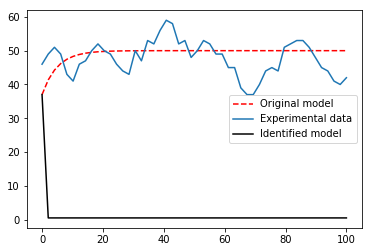

In [2]:
timepoints = pid.timepoints
M_original = Model('models/toy_model.xml')
sim_x = py_simulate_model(timepoints, Model = M_original, stochastic = False)
sim_x_inf = py_simulate_model(timepoints, Model = fitted_model, stochastic = False)
plt.plot(timepoints, sim_x['X'], 'r--', label = 'Original model')
plt.plot(timepoints, data.get('X'), label = 'Experimental data')
plt.plot(timepoints, sim_x_inf['X'], 'k', label = 'Identified model')

plt.legend()

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.